# ICE3333 - Elementos Finitos No-Lineales - Taller 06 (material complementario) 
## Suavización de tensiones para elasticidad lineal

## Marco teórico
En este taller resolveremos mediante elementos finitos un problema de elasticidad lineal en 2D obteniendo como resultado el campo de desplazamientos $\boldsymbol{u}$. Luego, calcularemos las tensiones y aplicaremos el método de suavización de tensiones $L^2$ para encontrar los valores nodales del campo de tensiones.


A modo de motivación, planteamos la formulación fuerte del problema de elasticidad lineal:

Encuentre $\boldsymbol{u}\in C^2(\Omega \times \mathbb{R}^n)$ tal que
	\begin{equation*}
	\begin{gathered}
	\text{div} \boldsymbol{\sigma}+ \boldsymbol{b}=0      \ \ \ x \in \Omega\\
    \boldsymbol{\sigma} =\boldsymbol{\mathbb{C}} :\boldsymbol{\varepsilon}       \ \ \ x \in \Omega\\
   \varepsilon =\frac{1}{2}(\nabla \boldsymbol{u} +\nabla \boldsymbol{u}^T)     \ \ \ x \in \Omega\\
	\boldsymbol{u} =\bar{\boldsymbol{u}}  \ \ \ x \in \partial \Omega_D \\
	\boldsymbol{\sigma} \boldsymbol{n} =\bar{\boldsymbol{t}}  \ \ \ x \in \partial \Omega_N \\
	\end{gathered}\label{eq:Elast}
	\end{equation*}
    
Como sabemos, el problema de elementos finitos asociado puede ser planteado como:

Dada $K \in R^{N \times N}$ y $F\in R^N$,   encuentre $\boldsymbol{u} \in R^N$  tal que
	\begin{equation}
    K\boldsymbol{u}=F
	\end{equation} \\
    
    
donde $K$ y $F$ pueden ser obtenidas mediante el ensamblaje de las contribuciones elementales $k^e$ y $f^e$:    
     \begin{equation}
        {k}^e =\int_{{\Omega}^e}  \boldsymbol{B}^{eT} \boldsymbol{C} \boldsymbol{B}^e  dx
	\end{equation}
  \begin{equation}
        {f}^e =\int_{{\Omega}^e} \boldsymbol{N^{eT}} \boldsymbol{b} \ dx+ \int_{ \partial \Omega_{N}} \boldsymbol{N^{eT}} \bar{\boldsymbol{t}} ds 
	\end{equation}
    
    
Una vez encontrado $\boldsymbol{u}$, es posible expresar el campo de tensiones como 
 \begin{equation}
  \boldsymbol{\sigma}^{eh} (x) =\boldsymbol{C} \boldsymbol{B}^e (x) \boldsymbol{u}^e
 \end{equation}
    
    
    
Sin embargo, si se utiliza directamente lo anterior, existen discontinuidades en el cálculo de tensiones. Para solucionar esto, se propone un campo de tensiones suavizado
\begin{equation}
  \bar{\sigma}^{} (x) = \sum N_A (x)  \bar{\sigma}_{A}  
 \end{equation}    
 
 y minimizamos la distancia $L^2$ entre el campo FEM y el aproximante
 \begin{equation}
\text{min}     \int_\Omega ( \boldsymbol{\sigma}^{h} (x)-\bar{\sigma}^{} (x) )^2 dx \Leftrightarrow {M} \boldsymbol{\Sigma}={P} 
 \end{equation}  
 
 donde $M$ y $P$ mediante ensamblaje de
      \begin{equation}
        {m}^e =\int_{{\Omega}^e}  \boldsymbol{N}^{eT}  \boldsymbol{N}^e  dx
	\end{equation}
  \begin{equation}
        {p}^e =\int_{{\Omega}^e} \boldsymbol{N^{eT}} \sigma^{eh}  \ dx
	\end{equation}
 
 y finalmente encontramos las tensiones nodales proyectadas (suavizadas) $\boldsymbol{\Sigma}=[\bar{\sigma_1},...,\bar{\sigma_n}]^T$
 

### Resolución mediante elementos finitos en Python

En primer lugar, importamos las librerías necesarias para resolver el problema. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Como geometría consideraremos un cuadrado de $L=H=4$, empotrada en su base y con una tensión aplicada en el centro de su frontera superior. Generamos la geometría y arreglos necesarios: XYZ,IEN,ID,LM 

In [21]:
def MeshDomain(ndx,ndy,L,H): 
    nen=4
    nel=ndx*ndy
    nnodes=(ndx+1)*(ndy+1)

    xyz=np.zeros([nnodes,2])
    dx=np.linspace(0,L,ndx+1)
    dy=np.linspace(0,H,ndy+1)
    cont=0
    for i in np.arange(dy.shape[0]):
        for j in np.arange(dx.shape[0]):
            xyz[cont,0]=dx[j]
            xyz[cont,1]=dy[i]
            cont=cont+1
   
    IEN=np.zeros([nel,nen], dtype=int)
    cont=0
    for i in np.arange(ndy):
        b1=np.linspace(i*(ndx+1),i*(ndx+1)+ndx,ndx+1)
        b2=b1+ndx+1
        for j in np.arange(ndx):                
            e1=np.array([b1[j+0],b1[j+1],b2[j+1],b2[j+0]])
            IEN[cont]=e1
            cont=cont+1
     
    ID=np.zeros([nnodes,2],dtype=int)
    cont=0
    for i in np.arange(nnodes):
        if xyz[i,1]==0:
            ID[i,0]=-1
            ID[i,1]=-1
        else:
            ID[i,0]=cont
            cont=cont+1
            ID[i,1]=cont
            cont=cont+1
     
    LM=np.zeros([nel,8],dtype=int)
    for e in np.arange(nel):
        LM[e,0]=ID[IEN[e,0],0]
        LM[e,1]=ID[IEN[e,0],1]
        LM[e,2]=ID[IEN[e,1],0]
        LM[e,3]=ID[IEN[e,1],1]
        LM[e,4]=ID[IEN[e,2],0]
        LM[e,5]=ID[IEN[e,2],1]
        LM[e,6]=ID[IEN[e,3],0]
        LM[e,7]=ID[IEN[e,3],1]
    
    
    return (xyz,IEN,ID,LM)   
   
     
ndx=20
ndy=20
L=4
H=4
XYZ,IEN,ID,LM =MeshDomain(ndx,ndy,L,H) 

Creamos función que nos permitirá resolver las integrales numericamente en el dominio isoparamétrico. En particular, esta función nos entrega los puntos de integración y pesos asociados. Para lo anterior, recordamos que estas pueden obtenerse a partir de los puntos y pesos en 1D. 

In [22]:
def GaussQuad(k):
    if k==1:
        wl=np.array([2.])
        xil=np.array([0.])        
    elif k==2:
        wl=np.array([1.,1.])
        xil=np.array([-1.,1.])*(1/np.sqrt(3.))
    elif k==3:
        wl=np.array([5/9, 8/9, 5/9])
        xil=np.array([-0.7745966692414834,
                      0,0.7745966692414834])     
    elif k==4:
        wl=np.array([0.347854845, 0.652145155,
                     0.652145155,0.347854845])
        xil=np.array([-0.861136312,-0.339981044,
                      0.339981044,0.861136312])    
    elif k==5:
        wl=np.array([0.236926885 , 0.478628670 ,0.568888889 , 0.478628670 , 0.236926885])
        xil=np.array([-0.906179846,-0.538469310,0,            0.538469310,0.906179846])   
        

    return xil,wl

def QuadGaussQuad(k):
    xil,wl=GaussQuad(k)
    
    xi = np.zeros([k*k,2])
    w = np.zeros(k*k)
    
    cont = 0
    for i in range(k):
        for j in range(k):
            xi[cont] = np.array([xil[i], xil[j]])
            w[cont] = wl[i]*wl[j]
            cont += 1
            
    return xi,w


Creamos una función que nos permita obtener las funciones de forma y sus derivadas. Para ello, recordamos que estas pueden ser obtenidas a partir de las expresiones en el dominio isoparamétrico
 \begin{equation}
N_a^e(x)=\hat{N}_a(\hat{\xi}(x))
	\end{equation}


 \begin{equation}
\nabla_x N_a^e(x)=J^{-T} \nabla_\xi \hat{N}_a 
	\end{equation}

In [23]:
def Q1shp(xeset,xi_):
    xi, eta = xi_[0], xi_[1]
    
    N1hat = 1/4*(1-xi)*(1-eta)
    N2hat = 1/4*(1+xi)*(1-eta)
    N3hat = 1/4*(1+xi)*(1+eta)
    N4hat = 1/4*(1-xi)*(1+eta)
    
    DN1hat = np.array([-1/4.*(1-eta),-1/4.*(1-xi)])
    DN2hat = np.array([1/4.*(1-eta),-1/4.*(1+xi)])
    DN3hat = np.array([1/4.*(1+eta),1/4.*(1+xi)])
    DN4hat = np.array([-1/4.*(1+eta),1/4.*(1-xi)])
    
    Nhat = np.matrix([N1hat,N2hat,N3hat,N4hat])
    DNhat = np.matrix([DN1hat,DN2hat,DN3hat,DN4hat]).T
    
    J = xeset*DNhat.T
    
    detJ = np.abs(np.linalg.det(J))
    DN = np.linalg.inv(J).T*DNhat
    xhat = Nhat*xeset.T
    N = Nhat
    
    return xhat, N, DN, detJ

Creamos funciones auxiliares que nos permiten obtener las matrices $\boldsymbol{B}^e$ y $\boldsymbol{N}^e$ que usaremos para las matrices de rigidez elemental

In [24]:
def BElasticity(DN):
    B = np.matrix([[DN[0,0],0],
                   [0,DN[1,0]],
                   [DN[1,0],DN[0,0]]])
    for i in np.arange(1,DN.shape[1]):
        Baux = np.matrix([[DN[0,i],0],
                  [0,DN[1,i]],
                  [DN[1,i],DN[0,i]]])
        B = np.hstack([B,Baux])
    return B

def NElasticity(NN):
    N = np.matrix([[NN[0,0],0],
                 [0,NN[0,0]]])
    for i in np.arange(1,NN.shape[1]):
        Naux = np.matrix([[NN[0,i],0],
                      [0,NN[0,i]]])
        N = np.hstack([N,Naux])
    return N
    

Ahora, creamos una función que nos permita obtener la matriz de rigidez y vector de fuerzas elemental para elasticidad lineal y otra que nos permita ensamblar sus contribuciones

In [25]:
def Q1kefeElasticity(xeset, C, f, k):
    ned = 2
    nen = xeset.shape[1]
    nee = ned*nen
    
    xil,wl = QuadGaussQuad(k)
    
    ke = np.asmatrix(np.zeros([nee,nee]))
    fe = np.asmatrix(np.zeros(nee)).T 
    
    for l in np.arange(len(wl)):
        xi = xil[l]
        w = wl[l]
        xhat, N_, DN, detJ = Q1shp(xeset, xi)
        
        B = BElasticity(DN)
        N = NElasticity(N_)  
        
        fe = fe+w*(N.T*f)*detJ
        ke = ke+w*(B.T*C*B)*detJ 
       
    return ke,fe    



def Q1ElasticityAssemble(xyz, IEN, LM, C, f, k):
    Nel=IEN.shape[0]
    Nee=LM.shape[1]
    ndofs=np.max(LM)+1
    
    K=np.asmatrix(np.zeros([ndofs,ndofs]))
    F=np.asmatrix(np.zeros([ndofs,1]))
    
    for e in np.arange(Nel):
        xeset = np.asmatrix(xyz[IEN[e]]).T 
        ke,fe=Q1kefeElasticity(xeset, C, f, k)
        for p in np.arange(Nee):
            P=LM[e,p]
            if P!=-1:
                for q in np.arange(Nee):
                    Q=LM[e,q]
                    if Q!=-1:
                        K[P,Q]=K[P,Q]+ke[p,q]
                F[P]=F[P]+fe[p]
    
    return K, F 
  

Planteamos las propiedades del material, definimos los elementos y nodos con carga y resolvemos el problema

In [26]:


#io.write_points_cells('Malla'+'.vtk',XYZ,{'quad': IEN}) #Visualizar malla en Paraview

k = 2
E = 9000  
nu = 0.3
f = 0*np.matrix([0,-1]).T    #Fuerzas de cuerpo nulas
q= -20        #Carga distribuida en el centro de su frontera superior
C = E/(1-nu**2)*np.matrix([[1,nu,0.],[nu,1,0],[0.,0.,0.5-nu/2]])

etaf=[429,430,431] #Nodos con carga
elemf=[389,390] #Elementos con carga

K,F = Q1ElasticityAssemble(XYZ, IEN, LM, C, f, k)

#La expresión anterior solo considera el aporte de las fuerzas de cuerpo, en las siguientes líneas agregamos las tracciones en superficie
for e in elemf:
    nodes = IEN[e]
    nodf = np.array([], dtype=int)
    for i in nodes:
        if i in etaf:
            nodf = np.append(nodf, i)
    Lx=L/ndx
    Ftotal = q*Lx
    
    F[ID[nodf,1]] = F[ID[nodf,1]] + Ftotal/2
    
u = np.linalg.solve(K,F)

Ahora generamos una rutina que nos permita transformar el vector $u$  a un arreglo de las mismas dimensiones que XYZ

In [27]:
def DispMap(xyz,ID,u):
    DispMap = np.zeros(xyz.shape)
    for i in np.arange(xyz.shape[0]):
        if ID[i,0] != -1:
            DispMap[i,0] = u[ID[i,0]]
        if ID[i,1] != -1:
            DispMap[i,1] = u[ID[i,1]]
            
    return DispMap

dispmap = DispMap(XYZ, ID, u)
#io.write_points_cells('Deformada'+'.vtk',XYZ,{'quad': IEN},point_data={'Desplazamiento':dispmap}) #Desplazamientos en Paraview


Utilizando los desplazamiento, encontraremos las tensiones proyectadas. Para ello, creamos funciones que nos permitan obtener $m^e$ y $p^e$ y luego su ensamblaje

In [28]:
def Q1mepe(xeset,ueset,C,k,lumpedMatrix):
    xil,wl = QuadGaussQuad(k)
    me = np.zeros([4,4])
    pe = np.zeros([4,3])
    u = np.matrix([ueset[0,0],ueset[1,0],ueset[0,1],ueset[1,1],
                   ueset[0,2],ueset[1,2],ueset[0,3],ueset[1,3]]).T
    for l in np.arange(len(wl)):
        xi = xil[l,:]
        w = wl[l]
        xhat,N,DN,detJ = Q1shp(xeset,xi)
        me = me + w*(N.T*N)*detJ
                
        B = BElasticity(DN)
        sigma = C*B*u
        pe = pe + w*(N.T*sigma.T)*detJ
        
    if lumpedMatrix:
        m1 = np.zeros(4)
        for i in np.arange(me.shape[0]):
            for j in np.arange(me.shape[1]):
                m1[i] = m1[i]+me[i,j]
        me = np.diag(m1)
                
    return me,pe

def Q1L2StressSmoothingAssemble(xyz,dispmap,IEN,C,k,lumpedMatrix):
    M = np.zeros([xyz.shape[0],xyz.shape[0]])
    P = np.zeros([xyz.shape[0],3])
    
    LM_smooth = IEN
    for e in np.arange(IEN.shape[0]):
        xeset = np.asmatrix(xyz[IEN[e]]).T 
        ueset = np.asmatrix(dispmap[IEN[e]]).T 
        
        me,pe = Q1mepe(xeset,ueset,C,k,lumpedMatrix)
        
        for p in np.arange(4):
            A = LM_smooth[e,p]
            for q in np.arange(4):
                B = LM_smooth[e,q]
                M[A,B] = M[A,B] + me[p,q]
            P[A,0] = P[A,0] + pe[p,0]
            P[A,1] = P[A,1] + pe[p,1]
            P[A,2] = P[A,2] + pe[p,2]
          
    return M,P


Finalmente, resolvemos $M \Sigma = P$ y encontramos las tensiones proyectadas

In [29]:
M,P = Q1L2StressSmoothingAssemble(XYZ,dispmap,IEN,C,k,True)
sigma = np.linalg.solve(M,P)
#io.write_points_cells('Tensiones'+'.vtk',XYZ,{'quad': IEN},point_data={'Desplazamiento':dispmap,'sigma':sigma})


Graficamos como ejemplo las tensiones $\sigma_y$ en función de su altura $y$ para $x=L/2$

Text(0, 0.5, 'Coordenada y')

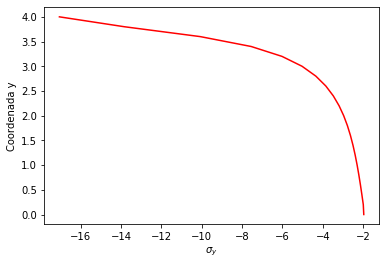

In [18]:
alturas=[]
sigmay=[]
for i in np.arange(XYZ.shape[0]):
    if XYZ[i,0]==L/2:
        sigmay.append(sigma[i,1])
        alturas.append(XYZ[i,1])

plt.plot(sigmay,alturas,'r')
plt.xlabel('$\sigma_y$')
plt.ylabel('Coordenada y')       